In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [74]:
import seaborn as sns

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv') 

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

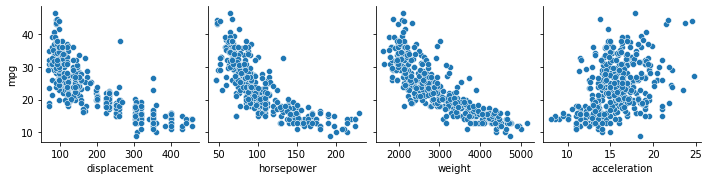

In [78]:
sns.pairplot(df, x_vars = ['displacement','horsepower','weight','acceleration'], y_vars = ['mpg'])

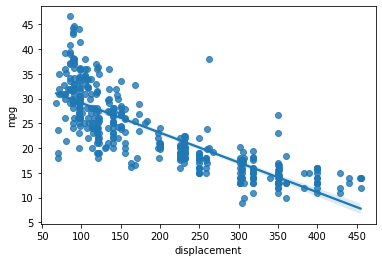

In [77]:
sns.regplot(x = 'displacement', y='mpg', data = df)

In [25]:
y = df['mpg']

In [26]:
y.shape

(392,)

In [27]:
X = df[['displacement','horsepower','weight','acceleration']]

In [28]:
X.shape

(392, 4)

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [39]:
X = ss.fit_transform(X)

In [51]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state =2559 )

In [53]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

In [52]:
from sklearn.linear_model import LinearRegression

In [59]:
lr =LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
lr.intercept_

23.550174663321116

In [63]:
lr.coef_

array([-0.28911161, -2.23634341, -4.6001626 , -0.33658753])

In [64]:
y_pred = lr.predict(X_test)

In [65]:
y_pred

array([26.0778798 , 20.72365282, 20.8259242 , 22.79874415, 28.23263452,
       30.40665273, 23.4539761 , 26.12391652, 25.34196123, 29.69300273,
       31.30370288, 19.12154466, 23.36210711, 21.45697644, 18.01840401,
       26.21777727, 24.74525637, 25.08103105, 26.97001347, 14.16273685,
       30.00473194, 29.93084807, 30.01447896, 21.03524518, 17.09967758,
       29.6010561 , 28.10625715, 12.44204294, 25.95376717, 22.40459816,
        8.64553922, 25.86067752, 18.01005883, 29.75558636,  8.40530571,
       32.42498177, 24.44675952, 13.00097999,  5.67104947, 29.91646626,
       28.06404734, 24.46192483,  7.46558859, 21.40350014, 30.37821103,
       20.69893478, 20.93762606, 30.89469426, 26.23258928, 15.38819554,
       31.83568857, 23.25136539, 23.38640099, 13.9766931 , 32.1265156 ,
       11.26356059, 13.29282554, 17.32638283, 10.74367919, 34.01750154,
       24.79495728, 31.28427285, 16.0112343 , 21.62730491, 19.94846531,
       29.41949848, 25.21613919, 27.63923927, 25.05251861, 29.50

In [69]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [67]:
mean_absolute_error(y_test,y_pred)

3.084633504411679

In [68]:
mean_absolute_percentage_error(y_test,y_pred)

0.1431573885599198

In [71]:
r2_score(y_test, y_pred)

0.6826993777561601

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
poly = PolynomialFeatures(degree =2, interaction_only=True, include_bias=False,)

In [82]:
X_train2 = poly.fit_transform(X_train)

In [83]:
X_test2 = poly.fit_transform(X_test)

In [84]:
lr.fit(X_train2, y_train)

LinearRegression()

In [85]:
lr.intercept_

21.28705220441139

In [86]:
lr.coef_

array([-1.58491666e+00, -5.79779888e+00, -1.97325272e+00, -1.32082515e+00,
        9.12609115e-01,  1.00323535e-01, -6.31128944e-04,  1.38120142e+00,
       -8.95885391e-01,  1.08619435e+00])

In [87]:
y_pred_poly = lr.predict(X_test2)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, r2_score

In [90]:
mean_absolute_error(y_test, y_pred_poly)

2.653885056174966

In [91]:
mean_absolute_percentage_error(y_test,y_pred)

0.1431573885599198

In [92]:
r2_score(y_test,y_pred_poly)

0.7520716267618535